In [3]:
# Libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport 
import missingno as msno
import matplotlib.pyplot as plt

# Prophet dependencies
from prophet import Prophet
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#plotly.offline.init_notebook_mode(connected=True)
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot


AttributeError: module 'plotly.graph_objs' has no attribute 'Funnel'

In [14]:
store = pd.read_csv("./data/store.csv")
sales = pd.read_csv("./data/train.csv")

# drop customer col
sales = sales.drop('Customers', axis=1)
#sales = sales.drop(columns='Customers')

# drop NA's from sales (2.7% only)
sales = sales.dropna()


/Users/alcachofa/opt/anaconda3/envs/minic37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
msno.matrix(sales)

In [ ]:
%matplotlib inline
msno.matrix(store)

In [ ]:
profile = ProfileReport(store, title="Pandas Profiling Report", explorative=True)
profile

# Prophet
- clean data
- fit prophet

In [20]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [40]:
# convert cols to int
to_int = ["Store", "DayOfWeek", "Open", "Promo", "SchoolHoliday"]
for i in to_int:
    sales[i] = sales[i].astype(np.int64)
    


In [43]:
# convert StateHoliday to Cat
sales['StateHoliday'] = pd.Categorical(sales['StateHoliday'])
sales['Date'] = pd.to_datetime(sales["Date"])

In [53]:

sales.head()
sales.dtypes

Date             datetime64[ns]
Store                     int64
DayOfWeek                 int64
Sales                   float64
Open                      int64
Promo                     int64
StateHoliday           category
SchoolHoliday             int64
dtype: object

In [54]:
single_sales = sales.query("Store == 1")
single_sales = single_sales.drop(["StateHoliday", "SchoolHoliday"], axis=1)

In [55]:
single_sales.dtypes


Date         datetime64[ns]
Store                 int64
DayOfWeek             int64
Sales               float64
Open                  int64
Promo                 int64
dtype: object

In [56]:
max(single_sales["Date"])

Timestamp('2014-07-31 00:00:00')

In [60]:
# prophet
single_sales.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# split last 10 days from shop==1
X_train = single_sales[single_sales.ds<='2014-07-20'][['ds', 'y']]
X_test = single_sales[single_sales.ds>'2014-07-20'][['ds']]

In [61]:
# fit
model = Prophet()
model.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -52.6571


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       728.045   0.000100389       83.1991      0.2157           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       728.136   0.000373529       101.267   3.891e-06       0.001      210  LS failed, Hessian reset 
     188       728.165   5.53513e-07       92.3993   6.767e-09       0.001      328  LS failed, Hessian reset 
     199       728.165   7.55815e-08       78.1492      0.7518      0.7518      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       728.165   2.29367e-08       76.4358       0.247           1      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [62]:
# check the predictions for the training data
pred_train = model.predict(X_train)

# use the trained model to make a forecast
pred_test = model.predict(X_test)

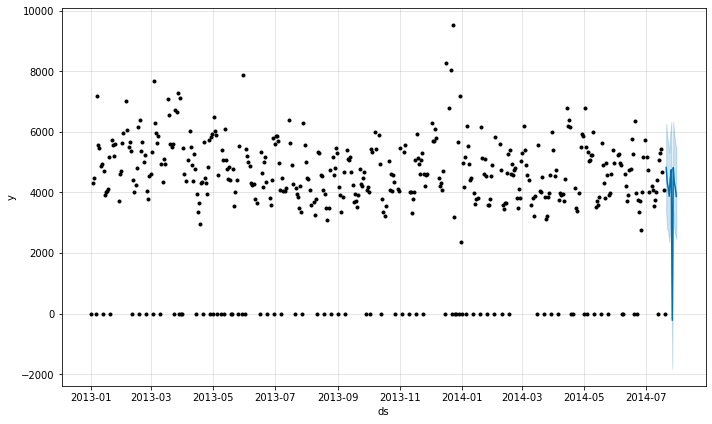

In [63]:
p = model.plot(pred_test)

In [72]:
plot_plotly(model, pred_train)

NameError: name 'go' is not defined